In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import sklearn
from sklearn import model_selection
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


def create_dataframe(min, max, n_samples):
    # intialise dataframe
    df = pd.DataFrame({
        'x1': (max - min) * np.random.random_sample(n_samples) + min,
        'x2': (max - min) * np.random.random_sample(n_samples) + min
        } )
    # create response
    df['y'] = create_nonlinear_response(df)
    return df

def create_nonlinear_response(df):
    return np.cos(2 * df['x1']) + np.cos(3 * df['x2'])

df = create_dataframe(-3, 3, 1000)

# Optional 3rd feature that improves fit
df['x3'] = np.cos(df['x2'])

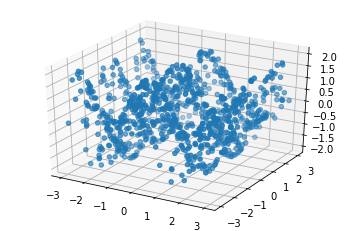

In [2]:
# 3-D plot of data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['y'])
# plt.show()

# RANDOMLY split the data into train and test sets
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.33)

X = ['x1', 'x2'] #'x3'
y = 'y'

In [3]:
df_test

,x1,x2,y,x3
313,2.518403,1.752391,0.836988,-0.180598
42,1.846681,-2.073042,0.146351,-0.481395
392,1.296121,1.042873,-1.852780,0.503741
196,1.244874,-0.214475,0.005080,0.977088
281,0.460083,0.858464,-0.238257,0.653601
...,...,...,...,...
147,0.392670,-1.603021,0.803671,-0.032219
219,0.302671,2.640249,0.755590,-0.876938
800,0.659009,2.285924,1.089513,-0.655714
995,1.217302,1.887676,0.053465,-0.311603


Epoch 1/30
21/21 [==============================] - 0s 23ms/step - loss: 1.0282 - val_loss: 0.8976
Epoch 2/30
21/21 [==============================] - 0s 8ms/step - loss: 0.9659 - val_loss: 0.9909
Epoch 3/30
21/21 [==============================] - 0s 8ms/step - loss: 0.9841 - val_loss: 0.8582
Epoch 4/30
21/21 [==============================] - 0s 8ms/step - loss: 0.9494 - val_loss: 0.8492
Epoch 5/30
21/21 [==============================] - 0s 8ms/step - loss: 0.9638 - val_loss: 0.8954
Epoch 6/30
21/21 [==============================] - 0s 8ms/step - loss: 0.9878 - val_loss: 0.8367
Epoch 7/30
21/21 [==============================] - 0s 8ms/step - loss: 0.9285 - val_loss: 0.8197
Epoch 8/30
21/21 [==============================] - 0s 8ms/step - loss: 0.9024 - val_loss: 0.8240
Epoch 9/30
21/21 [==============================] - 0s 8ms/step - loss: 0.8655 - val_loss: 0.9535
Epoch 10/30
21/21 [==============================] - 0s 8ms/step - loss: 0.8068 - val_loss: 0.7766
Epoch 11/30
21/21 

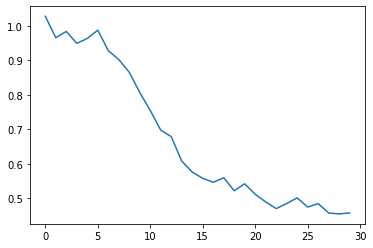

In [4]:
# build the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

i = Input(shape=(len(X),))
x = Dense(128, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

# compile the model
opt = tf.keras.optimizers.Adam(0.01) # adam opt with custom learning rate
model.compile(optimizer=opt, loss='mse')
history = model.fit(
    df_train[X],
    df_train[y],
    validation_data=(df_test[X], df_test[y]),
    epochs=30
)

df_history = pd.DataFrame(history.history)
for metric in ['loss']:
    df_history[metric].plot()

<ipython-input-5-c8fb53f935b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = model.predict(df_test[X])
<ipython-input-5-c8fb53f935b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['residual'] = (df_test['y'] - df_test['y_pred'])


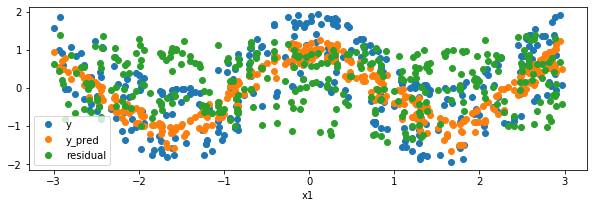

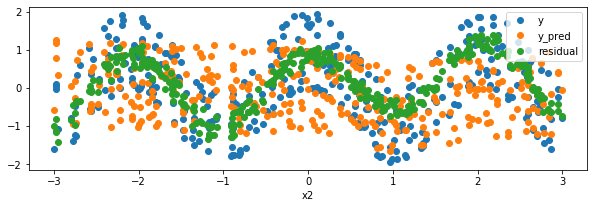

In [5]:
df_test['y_pred'] = model.predict(df_test[X])
df_test['residual'] = (df_test['y'] - df_test['y_pred'])
for x in X:
    df_test.plot(x, y=['y', 'y_pred', 'residual'], figsize=(10,3), style='o')

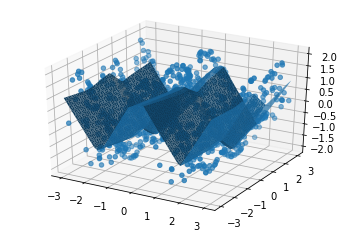

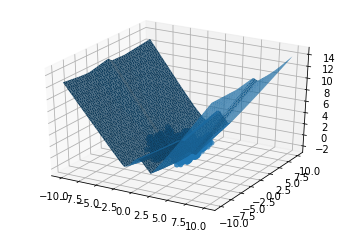

In [6]:
def plot_prediction_surface(df, model,min, max):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['x1'], df['x2'], df['y'])
    # surface plot
    line = np.linspace(min, max, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Yhat = model.predict(Xgrid).flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
    plt.show()
    
plot_prediction_surface(df, model, -3, 3)
# Can the model extrapolate?
# Answer: No. The activation function is not periodic, 
#   so model cannot predict a periodic function like this one.
plot_prediction_surface(df, model, -10, 10)

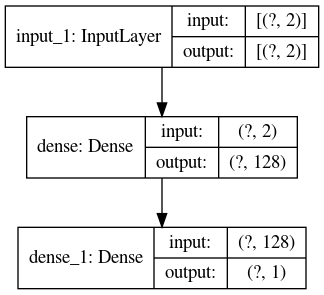

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)